<a href="https://colab.research.google.com/github/Aleena24/CaseStudy_Project/blob/main/caseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Kaggle Configurations

In [59]:
!pip install kaggle

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [64]:
!chmod 600 ~/.kaggle/kaggle.json

In [72]:
!kaggle datasets download -d bhavikjikadara/e-commerce-products-images


 99% 279M/283M [00:02<00:00, 123MB/s] 
100% 283M/283M [00:02<00:00, 104MB/s]


In [74]:
!unzip /content/e-commerce-products-images.zip -d /content/e-commerce-products-images


Streaming output truncated to the last 5000 lines.
  inflating: /content/e-commerce-products-images/e-commerce/images/58129.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/5813.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58131.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58132.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58133.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58135.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58136.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58137.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58138.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58139.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/5814.jpg  
  inflating: /content/e-commerce-products-images/e-commerce/images/58140.jpg  
  i

In [75]:
!ls /content/e-commerce-products-images/

e-commerce  styles.csv


# Library Import

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

# Dataset Import

In [79]:
df = pd.read_csv('/content/e-commerce-products-images/styles.csv')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


# Image Dataset Import

In [84]:
image_dir = '/content/e-commerce-products-images/e-commerce/images/'

In [86]:
def load_random_images(image_paths, num_images=20):
    random_sample = random.sample(list(image_paths), num_images)
    images = []
    for path in random_sample:
        image_path = os.path.join(image_dir, str(path) + '.jpg')
        img = load_img(image_path, target_size=(128, 128))
        images.append(img)
    return images

random_sample_images = load_random_images(df['id'], num_images=20)

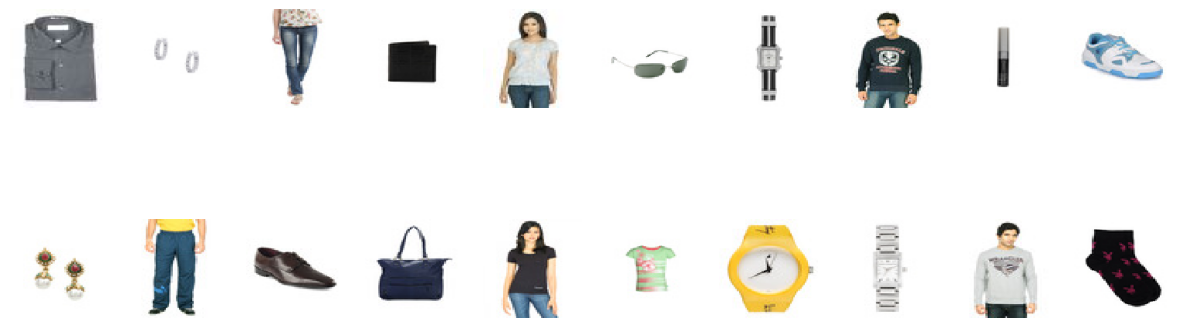

In [87]:
plt.figure(figsize=(15, 5))
for i in range(len(random_sample_images)):
    plt.subplot(2, 10, i + 1)
    plt.imshow(random_sample_images[i])
    plt.axis('off')
plt.show()